### Import dataset and libraries

In [3]:
# Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
custs_ords_prods_merge = pd.read_pickle('/Users/tony/Instacart Basket Analysis/02 Data/Prepared Data/custs_ords_prods_merge.pkl')

In [5]:
custs_ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Task 3
### Histogram for order_hour_per_day

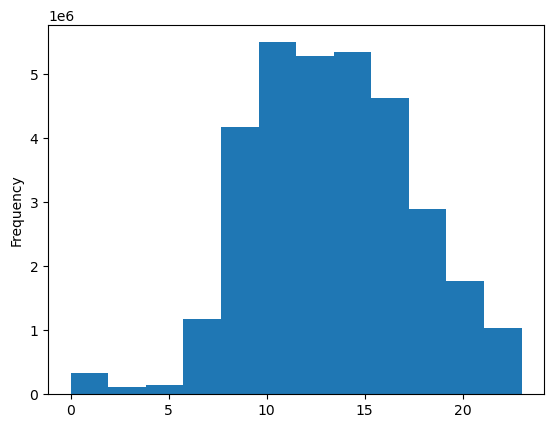

In [6]:
hist = custs_ords_prods_merge['order_hour_of_day'].plot.hist(bins = 12)

The histogram splits the dataset into 12 bins of 2 hours each. We can see that order volume peaks at different times. Most of the orders are placed between 10-15. Between 0-5 only a few orders are made.

## Task 4
### Bar chart for loyalty_flag

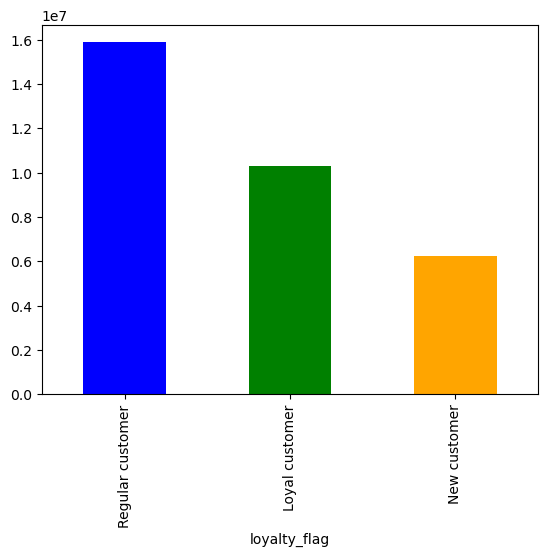

In [7]:
bar = custs_ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color =['blue', 'green', 'orange'])

Most customers are in the regular category. Followed by loyal customers.

## Task 5
### Line graph price and hour_of_the_day

In [8]:
# Create sample and split data

np.random.seed(4)
dev = np.random.rand(len(custs_ords_prods_merge)) <= 0.7

In [9]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [11]:
# Split into two samples
big = custs_ords_prods_merge[dev]
small = custs_ords_prods_merge[~dev]

In [12]:
# Check original dataframe lenght
len(custs_ords_prods_merge)

32404859

In [13]:
# Compare big + small dataframe sample to original lenght
len(big) + len(small)

32404859

In [14]:
# Create dataframe with only columns needed for the visualization
df = small[['order_hour_of_day','prices']]

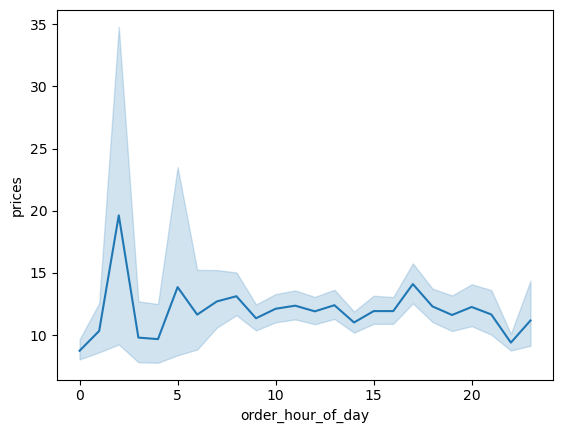

In [15]:
# Create line chart
line = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

## Task 6
### Line graph age and n_dependants

In [16]:
# Create dataframe with columns needed 
df_2 = small [['age','n_dependants']]

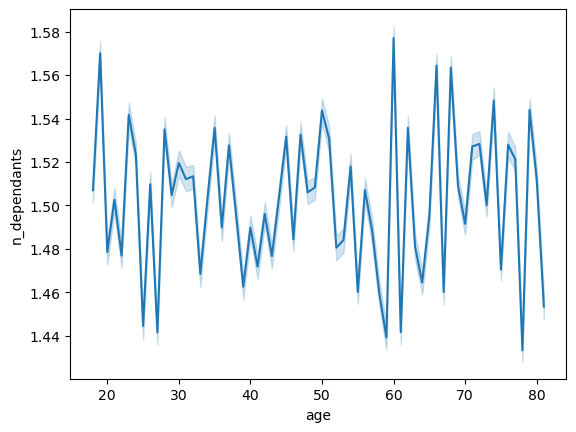

In [17]:
line_2 = sns.lineplot(data = df_2, x = 'age',y = 'n_dependants')

No clear pattern can bee seen which indicates a strong relationship between age and n_dependants.

## Task 7
### Scatter plot age and income

In [18]:
# Create dataframe with columns needed 
df_3 = small [['age','income']]

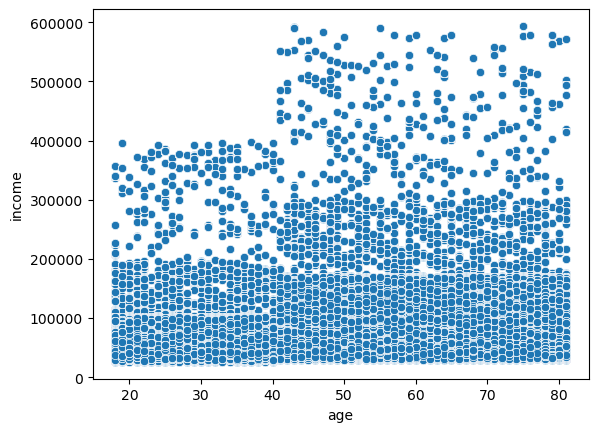

In [19]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df_3)

The scatterplot shows a a big variance of income for all age groups. Apart from that we can see income clusters. For example for 20-40 the max income is around 40.000. For 40-80 the max income is around 60.000. This shows that with higher age the income increases. That makes sense because with higher age more experienced is gained which results in a higher income. 

## Task 8
### Export visualizations

In [20]:
# Explort visualizations
hist.figure.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Histogramm Order Hour Frequency.png')
bar.figure.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Barchart Loyalty Flag.png')
line.figure.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Line Graph price x order.png')
line_2.figure.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Line age x n_dependants.png')
scatterplot.figure.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Scatterplot age x income.png')